## INTRODUCTION




### USEFUL READS AND LINKS

Slides Module 5

https://learn.continue.yorku.ca/pluginfile.php/1083576/mod_page/content/32/CSML%201000%20Module%205.pdf?time=1631259419880

Evaluation of clustering

https://github.com/achuthasubhash/Complete-Life-Cycle-of-a-Data-Science-Project/blob/master/Evaluation%20of%20Clustering.pdf

Association Rule Mining

https://towardsdatascience.com/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6

Clustering Tutorial

https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Clustering.ipynb

## PROJECT LINKS ##

Git Repo

https://github.com/ArslanAbakarov/clustering_ecommerce

Deployed app

https://aabakarov.shinyapps.io/clustering_ecommerce/

Video presentation

https://www.youtube.com/watch?v=Xp-dfF8NH8Q

The dataset

https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023


### PIPELINE

Business problem => Analytical Problem => Assemble Model Dataset

Data Exploration => Outliers, Missing Values, Duplicates, ???

Transformations

Dummy Encoding

Feature Selection

Train

Test


### DESCRIPTION



## INSTALL LIBRARIES ETC

In [ ]:
# INSTALL PYCARET

# !pip install pycaret
!pip install pycaret[full]

# !pip install scipy==1.9.3

### CHECK AVAILABLE HARDWARE

In [ ]:
import psutil
import os
import subprocess

# CPU Info
# cpu_info = subprocess.run(["lscpu"], capture_output=True, text=True)
# print("CPU Info:")
# print(cpu_info.stdout)

cpu_freq = subprocess.run("lscpu | grep 'Model name:'", shell=True, capture_output=True, text=True)
print("Model name:", cpu_freq.stdout.split(':')[1].strip())

# RAM Info
ram = psutil.virtual_memory()
print("\nRAM Info:")
print(f"Total RAM: {ram.total / (1024 ** 3):.2f} GB")
print(f"Available RAM: {ram.available / (1024 ** 3):.2f} GB")

Model name: Intel(R) Xeon(R) CPU @ 2.20GHz

RAM Info:
Total RAM: 12.67 GB
Available RAM: 10.11 GB


In [ ]:
# Check if GPU is available
gpu_info = subprocess.run(["nvidia-smi"], capture_output=True, text=True)

if "NVIDIA" in gpu_info.stdout:
    print("\nGPU Info:")
    print(gpu_info.stdout)
else:
    print("\nNo GPU available.")

## IMPORT DATASET


### **IF USING IN GOOGLE CLOUD**

In [ ]:
# LOAD DATASET and Dependencies
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.mosaicplot as mp

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
g_drive = 'gdrive/My Drive/'

# MAKE SURE YOU HAVE ML FOLDER AND THIS FILE IN IT FOR IT TO WORK
file_path = 'ML/ecommerce.csv'

df_path = os.path.join(g_drive, file_path)  #change dir to your project folder
full_df = pd.read_csv(df_path)

# OUTPUT DF
full_df

Mounted at /content/gdrive


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


### **IF USING LOCAL ENVIROMENT CONNECTION (need Jupiter Notebook installed)**

You need to install Jupiter Notebook. I recommend using WSL on Windows.

$ pip install jupyterlab

$ pip install jupyter_server

$ pip install notebook==6.5.6

---

$ jupyter notebook     --NotebookApp.allow_origin='https://colab.research.google.com'     --port=8888     --NotebookApp.port_retries=0

OR

$ python -m notebook

In [ ]:
# LOAD DATASET FOR LOCAL ENVIRONMENT

import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.mosaicplot as mp

# 2 mil of entries, loads pretty fast

file_path = '/mnt/c/ML/ecommerce.csv'

full_df = pd.read_csv(file_path)

# OUTPUT DF
# did it load?
full_df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


### WE SHOULD TAKE FRACTION for start

In [ ]:
# lets take fraction to start with, just percentage of the 2 mils

# 0.01 = 20,000 entries
# df = full_df.sample(frac=0.01, random_state=42)

df = full_df.sample(frac=0.5, random_state=42)
df.shape

(1009750, 12)

In [ ]:
# save the working dataset
df.to_csv('/mnt/c/ML/ecommerce_20k.csv', index=False)

In [ ]:
# import pycaret#
import pycaret
pycaret.__version__

'3.3.2'

## DATA EXPLORATION


### Let's begin

In [ ]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
794506,1253241,152060,6,1,20,23.0,115,2,1,7,beverages,water seltzer sparkling water
1900056,3058717,44755,2,1,15,30.0,37,4,0,1,frozen,ice cream ice
1986766,2252307,169119,12,4,15,9.0,123,19,0,4,produce,packaged vegetables fruits
794368,188072,162421,3,4,11,30.0,117,5,0,19,snacks,nuts seeds dried fruit
1623032,2627597,172693,19,0,23,5.0,17,8,0,13,pantry,baking ingredients
...,...,...,...,...,...,...,...,...,...,...,...,...
947634,111781,171256,37,5,12,7.0,50,9,0,19,snacks,fruit vegetable snacks
1378845,1848650,27596,2,3,16,7.0,67,1,1,20,deli,fresh dips tapenades
1069258,890387,113290,48,5,11,7.0,83,9,1,4,produce,fresh vegetables
438720,2872067,24736,14,0,14,9.0,78,2,1,19,snacks,crackers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009750 entries, 794506 to 423939
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1009750 non-null  int64  
 1   user_id                 1009750 non-null  int64  
 2   order_number            1009750 non-null  int64  
 3   order_dow               1009750 non-null  int64  
 4   order_hour_of_day       1009750 non-null  int64  
 5   days_since_prior_order  947720 non-null   float64
 6   product_id              1009750 non-null  int64  
 7   add_to_cart_order       1009750 non-null  int64  
 8   reordered               1009750 non-null  int64  
 9   department_id           1009750 non-null  int64  
 10  department              1009750 non-null  object 
 11  product_name            1009750 non-null  object 
dtypes: float64(1), int64(9), object(2)
memory usage: 100.1+ MB


In [ ]:
df.describe()

In [ ]:
## FIRST 100 entries
df.head(100)

### VALUES EXPLORATION

product_name
fresh fruits                  0.111951
fresh vegetables              0.105255
packaged vegetables fruits    0.054515
yogurt                        0.044762
packaged cheese               0.030601
                                ...   
kitchen supplies              0.000274
baby bath body care           0.000250
baby accessories              0.000229
beauty                        0.000180
frozen juice                  0.000154
Name: proportion, Length: 134, dtype: float64
product_name
fresh fruits                  113043
fresh vegetables              106281
packaged vegetables fruits     55047
yogurt                         45198
packaged cheese                30899
                               ...  
kitchen supplies                 277
baby bath body care              252
baby accessories                 231
beauty                           182
frozen juice                     156
Name: count, Length: 134, dtype: int64


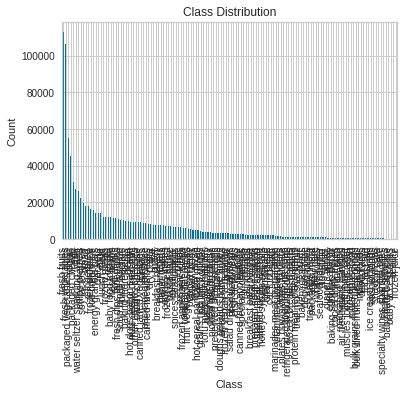

In [ ]:
# CLASS PROPORTIONS
class_proportions = df['product_name'].value_counts(normalize=True)
print(class_proportions)

target_values = pd.Series(df['product_name']).value_counts()
print(target_values)

df['product_name'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### product_name (values and plots)

In [ ]:
values = pd.Series(df['product_name']).value_counts()
print(values)

product_name
fresh fruits                  113043
fresh vegetables              106281
packaged vegetables fruits     55047
yogurt                         45198
packaged cheese                30899
                               ...  
kitchen supplies                 277
baby bath body care              252
baby accessories                 231
beauty                           182
frozen juice                     156
Name: count, Length: 134, dtype: int64


<Figure size 2880x2880 with 0 Axes>

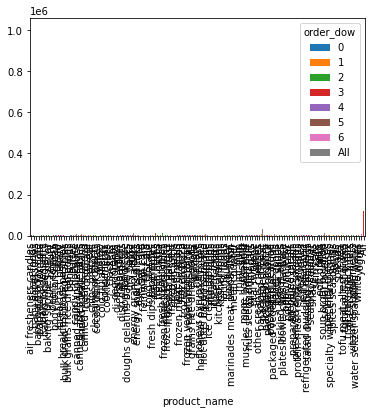

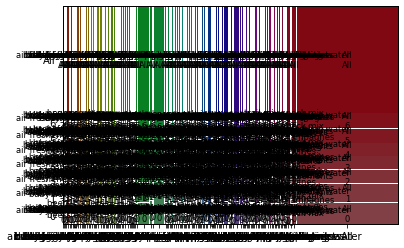

In [ ]:
import pandas as pd

# df['product_name'].value_counts().plot(kind='bar')
# plt.title('Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.show()

# class_proportions = df['product_name'].value_counts(normalize=True)
# print(class_proportions)

## Heart crosstab with Diabetes
plt.figure(figsize=(40, 40))
crosstab = pd.crosstab(df.product_name, df.order_dow, margins=True)
crosstab.plot.bar();
plt.show()
mp.mosaic(crosstab.stack());

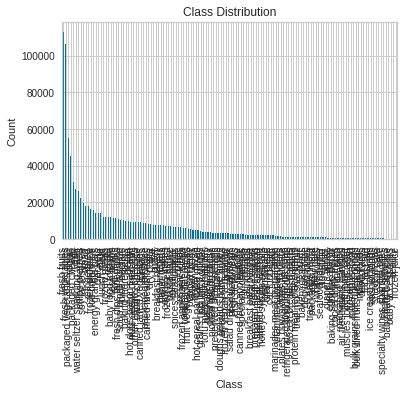

product_name
fresh fruits                  0.111951
fresh vegetables              0.105255
packaged vegetables fruits    0.054515
yogurt                        0.044762
packaged cheese               0.030601
                                ...   
kitchen supplies              0.000274
baby bath body care           0.000250
baby accessories              0.000229
beauty                        0.000180
frozen juice                  0.000154
Name: proportion, Length: 134, dtype: float64


In [ ]:
import statsmodels.graphics.mosaicplot as mp

df['product_name'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_proportions = df['product_name'].value_counts(normalize=True)
print(class_proportions)

#### Department

department
produce            294887
dairy eggs         168475
snacks              90050
beverages           84035
frozen              69832
pantry              58021
bakery              36400
canned goods        33026
deli                32452
dry goods pasta     27098
household           23153
meat seafood        22308
breakfast           22269
personal care       14114
babies              13074
international        8317
alcohol              4662
pets                 3056
missing              2411
other                1115
bulk                  995
Name: count, dtype: int64


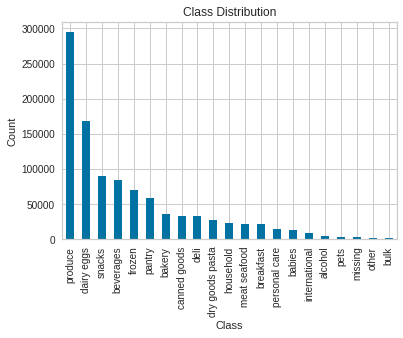

department
produce            0.292040
dairy eggs         0.166848
snacks             0.089180
beverages          0.083224
frozen             0.069158
pantry             0.057461
bakery             0.036049
canned goods       0.032707
deli               0.032139
dry goods pasta    0.026836
household          0.022929
meat seafood       0.022093
breakfast          0.022054
personal care      0.013978
babies             0.012948
international      0.008237
alcohol            0.004617
pets               0.003026
missing            0.002388
other              0.001104
bulk               0.000985
Name: proportion, dtype: float64


In [ ]:
values = pd.Series(df['department']).value_counts()

print(values)

df['department'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_proportions = df['department'].value_counts(normalize=True)
print(class_proportions)

### NULLS AND MISSING VALUES



<Axes: >

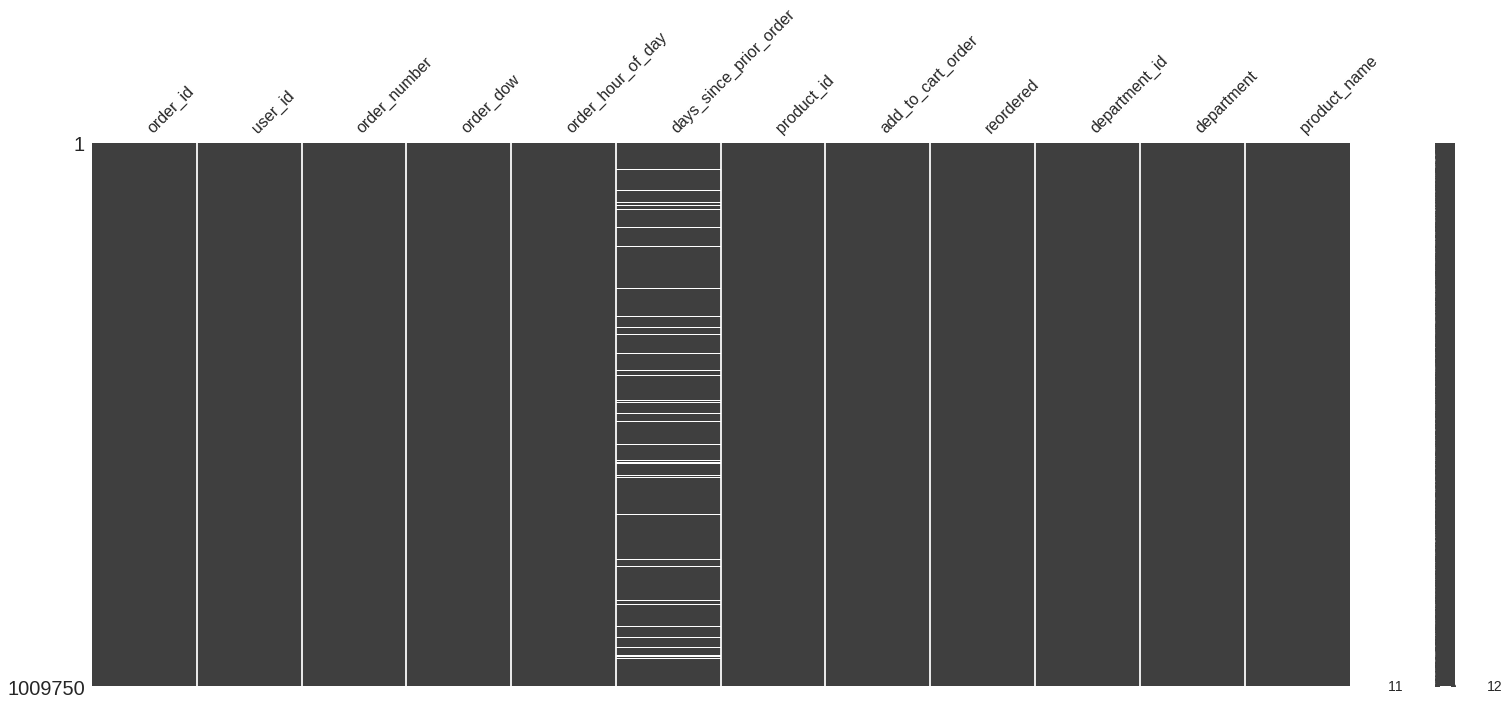

In [ ]:
# VISUALISE MISSING DATA 1
import missingno as msno
import seaborn as sns
msno.matrix(df)

# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
# we have no missing data in the dataset

In [ ]:
# CHECK FOR NULLS
df.isnull().sum()

# a lot of nulls in days_since_prior_order

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    62030
product_id                    0
add_to_cart_order             0
reordered                     0
department_id                 0
department                    0
product_name                  0
dtype: int64

days_since_prior_order    124342

#### CHECK ORDERS FOR NAN DAYS SINCE PRIOR ORDER

First orders, same day orders one after another... or missing data?

In [ ]:
import pandas as pd
import numpy as np

# Assuming your data is loaded into a pandas DataFrame called 'data'
# Step 1: Mark rows with NaN in 'days_since_prior_order'
df['is_first_order'] = np.where(df['days_since_prior_order'].isna(), True, False)

# Step 2: Group by 'user_id' to count total orders and first orders (NaN in 'days_since_prior_order')
user_order_analysis = df.groupby('user_id').agg(
    total_orders=('order_id', 'count'),
    first_orders=('is_first_order', 'sum')  # Count the orders marked as first
)

# Step 3: Filter users who have more than 1 order but also have a NaN (first order)
users_with_two_orders_and_nan = user_order_analysis[
    (user_order_analysis['total_orders'] > 2) & (user_order_analysis['first_orders'] > 1)
]

# Display the users who have more than one order and a NaN in 'days_since_prior_order'
users_with_two_orders_and_nan.head(100)

,total_orders,first_orders
user_id,,
38,25,7
56,8,4
63,40,6
90,17,5
99,6,6
...,...,...
2246,13,7
2268,4,4
2270,4,4


In [ ]:
# do not sort by order id, keep original order of the dataset.
# df_sorted = df.sort_values('order_id', ascending=False)

In [ ]:
user_id_to_find = 9642
user_entries = df[df['user_id'] == user_id_to_find]
user_entries

#### FIX NULLS FOR days_since_prior_order


Exploration prooves that we need to replace nulls with 0 since it's not nulls, it's 0 days since last one because those orders are the first ones that were made.


In [ ]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
is_first_order            0
dtype: int64

### OUTLIERS

k-means is very sensitive to outliers

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
def outputOutliers(columnName):
  Q1 = np.percentile(df[columnName], 25)
  Q3 = np.percentile(df[columnName], 75)

  # Calculate the Interquartile Range (IQR)
  IQR = Q3 - Q1

  # Define outlier thresholds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find outliers
  outliers = df[(df[columnName] < lower_bound) | (df[columnName] > upper_bound)]

  print("Lower bound for " + columnName + ": " + str(lower_bound))
  print("Upper bound for " + columnName + ": " + str(upper_bound))

  # Display the outliers
  outliers_values = outliers[columnName].values
  print("Outliers for " + columnName + ":")
  print(outliers_values)

In [ ]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name',
       'is_first_order'],
      dtype='object')

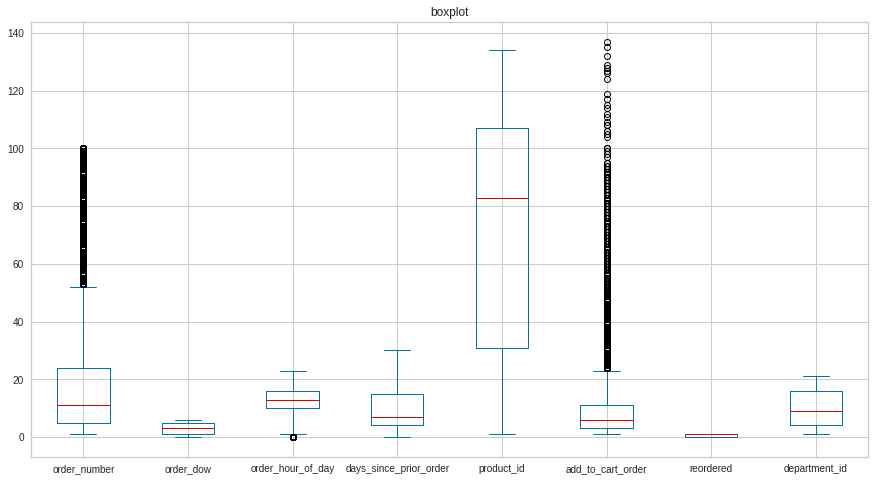

In [ ]:
ax = df[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id' ]].plot(kind='box', title='boxplot', figsize=(15,8))

Lower bound for order_number: -23.5
Upper bound for order_number: 52.5
Outliers for order_number:
[78 82 64 ... 58 55 55]


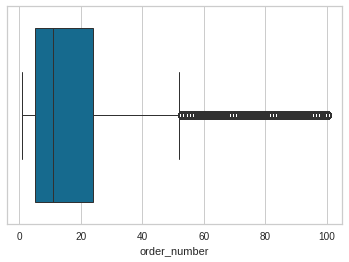

In [ ]:
# OUTLIERS
sns.boxplot(x=df['order_number'])
outputOutliers('order_number')

<Axes: xlabel='add_to_cart_order'>

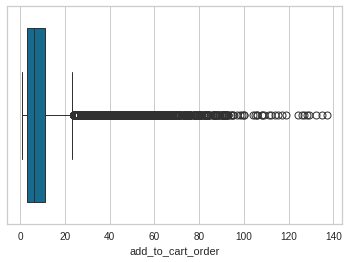

In [ ]:
# OUTLIERS
sns.boxplot(x=df['add_to_cart_order'])

Lower bound for order_hour_of_day: 1.0
Upper bound for order_hour_of_day: 25.0
Outliers for order_hour_of_day:
[0 0 0 ... 0 0 0]


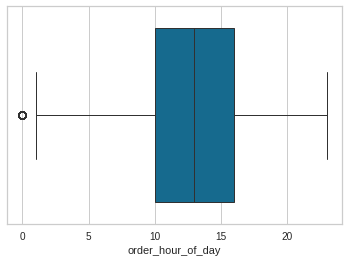

In [ ]:
# OUTLIERS
sns.boxplot(x=df['order_hour_of_day'])
outputOutliers('order_hour_of_day')

Lower bound for order_dow: -5.0
Upper bound for order_dow: 11.0
Outliers for order_dow:
[]


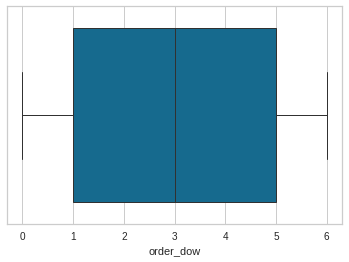

In [ ]:
# OUTLIERS
sns.boxplot(x=df['order_dow'])
outputOutliers('order_dow')

## PREPARING THE DATASET

### ENCODING (no need)

### LABEL ENCODING (no need)



We don't really need to Encode Products and Departments, they have their own ID field

#### Department

In [ ]:
#### Department
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the product_name column
df['department_encoded'] = label_encoder.fit_transform(df['department'])

df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,is_first_order,department_encoded
794506,1253241,152060,6,1,20,23.0,115,2,1,7,beverages,water seltzer sparkling water,False,3
1900056,3058717,44755,2,1,15,30.0,37,4,0,1,frozen,ice cream ice,False,10
1986766,2252307,169119,12,4,15,9.0,123,19,0,4,produce,packaged vegetables fruits,False,19
794368,188072,162421,3,4,11,30.0,117,5,0,19,snacks,nuts seeds dried fruit,False,20
1623032,2627597,172693,19,0,23,5.0,17,8,0,13,pantry,baking ingredients,False,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947634,111781,171256,37,5,12,7.0,50,9,0,19,snacks,fruit vegetable snacks,False,20
1378845,1848650,27596,2,3,16,7.0,67,1,1,20,deli,fresh dips tapenades,False,8
1069258,890387,113290,48,5,11,7.0,83,9,1,4,produce,fresh vegetables,False,19
438720,2872067,24736,14,0,14,9.0,78,2,1,19,snacks,crackers,False,20


#### Product Name

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the product_name column
df['product_name_encoded'] = label_encoder.fit_transform(df['product_name'])

df

#### CHECKING IF PRODUCT_ID IS UNIQUE FOR PRODUCT_NAME

 and PRODUCT NAME not being actually product category due to it's naming.
 Well it is a category, actual dataset was stripped of actual brands mentioning.

In [ ]:
df["product_name"].unique()


array(['water seltzer sparkling water', 'ice cream ice',
       'packaged vegetables fruits', 'nuts seeds dried fruit',
       'baking ingredients', 'dish detergents', 'fresh vegetables',
       'eggs', 'milk', 'paper goods', 'lunch meat', 'fresh fruits',
       'chips pretzels', 'frozen meals', 'packaged cheese',
       'canned fruit applesauce', 'cream', 'poultry counter', 'bread',
       'refrigerated', 'cereal', 'candy chocolate', 'oils vinegars',
       'baby food formula', 'salad dressing toppings', 'dry pasta',
       'soy lactosefree', 'granola', 'cookies cakes', 'soft drinks',
       'muscles joints pain relief', 'yogurt', 'hot dogs bacon sausage',
       'fresh dips tapenades', 'frozen breakfast', 'soap', 'coffee',
       'energy sports drinks', 'cat food care', 'grains rice dried goods',
       'facial care', 'energy granola bars', 'fresh herbs',
       'breakfast bakery', 'packaged produce', 'frozen appetizers sides',
       'prepared meals', 'hair care', 'soup broth bouill

In [ ]:
product_names = df["product_name"].unique()
nonUniqFound = 0
for product_name in product_names:
  products = df[df['product_name'] == product_name]
  if len(products['product_id'].unique()) > 1:
    print("Non unique: " + product_name)
    nonUniqFound = 1

if nonUniqFound == 0:
  print("All unique. Product ID is Product Name")


All unique. Product ID is Product Name


#### ONE-HOT ENCODING (no need)

In [ ]:
# DO NOT encode, you will endup with a 165 features
# ONE-HOT ENCODE
# creates columns true/false for categorical columns and removes those columns
# df = pd.get_dummies(df, columns=['product_name'], prefix=['product_name_'])
# df = pd.get_dummies(df, columns=['department'], prefix=['department'])

# doing one-hot we are ending up with  length=165 features

In [ ]:
# check if new columns appeared
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name',
       'is_first_order', 'department_encoded'],
      dtype='object')

### DUPLICATES (no duplicates)

In [ ]:
# CHECK FOR DUPLICATES
# should generally remove duplicates from your dataset
# Duplicates can artificially inflate model performance during training
# Removing duplicates reduces the dataset size, potentially speeding up data processing and model training times
# Duplicates can introduce inconsistencies if they contain slightly different values for the same entity, leading to conflicting information.

duplicates = df.duplicated()
print(df.duplicated().sum())

# NO DUPLICATES

0


REMOVE DUPLICATES (no duplicates originally)

In [ ]:
# REMOVE DUPLICATES
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


0


## TRAINING

### CLUSTERING BASED OFF PRODUCT PURCHASE HISTORY (final K-Means)


**Product recommendations based on products that are frequently purchased together**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
# With Aggregation
product_features = df.groupby(['user_id', 'product_name']).agg(
    purchase_count=('order_id', 'count'),
    reorder_rate=('reordered', 'mean'),
    avg_days_between=('days_since_prior_order', 'mean'),
    avg_cart_position=('add_to_cart_order', 'mean')
).reset_index()

product_features

,user_id,product_name,purchase_count,reorder_rate,avg_days_between,avg_cart_position
0,2,crackers,1,0.000000,10.000000,3.000000
1,2,fresh dips tapenades,1,0.000000,10.000000,6.000000
2,2,fresh fruits,3,0.666667,7.666667,2.000000
3,2,packaged cheese,2,0.000000,6.500000,3.000000
4,3,crackers,1,1.000000,9.000000,9.000000
...,...,...,...,...,...,...
686045,206209,fresh fruits,3,0.666667,18.000000,4.666667
686046,206209,milk,1,1.000000,22.000000,3.000000
686047,206209,packaged vegetables fruits,1,1.000000,22.000000,2.000000
686048,206209,soft drinks,3,1.000000,18.000000,3.000000


In [ ]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [ ]:
# Customer product matrix
# customer_product_matrix = product_features.pivot(
#     index='user_id',
#     columns='product_name',
#     values='purchase_count'
# ).fillna(0)

customer_product_matrix = product_features.pivot(
    index='user_id',
    columns='product_name',
    values='purchase_count'
).fillna(0)
# .reset_index()  if we include user_id that completely changes clustering

customer_product_matrix.columns

Index(['air fresheners candles', 'asian foods', 'baby accessories',
       'baby bath body care', 'baby food formula', 'bakery desserts',
       'baking ingredients', 'baking supplies decor', 'beauty',
       'beers coolers',
       ...
       'spreads', 'tea', 'tofu meat alternatives', 'tortillas flat bread',
       'trail mix snack mix', 'trash bags liners', 'vitamins supplements',
       'water seltzer sparkling water', 'white wines', 'yogurt'],
      dtype='object', name='product_name', length=134)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_product_matrix)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clustered_customer_product_matrix = customer_product_matrix.copy()

# clusters = kmeans.fit_predict(scaled_data)
clusters = kmeans.fit_predict(customer_product_matrix)

clustered_customer_product_matrix['Cluster'] = clusters
clustered_customer_product_matrix.columns

Index(['air fresheners candles', 'asian foods', 'baby accessories',
       'baby bath body care', 'baby food formula', 'bakery desserts',
       'baking ingredients', 'baking supplies decor', 'beauty',
       'beers coolers',
       ...
       'tea', 'tofu meat alternatives', 'tortillas flat bread',
       'trail mix snack mix', 'trash bags liners', 'vitamins supplements',
       'water seltzer sparkling water', 'white wines', 'yogurt', 'Cluster'],
      dtype='object', name='product_name', length=135)

In [ ]:
cluster_data = clustered_customer_product_matrix[clustered_customer_product_matrix['Cluster'] == 1]
cluster_data


product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,Cluster
user_id,,,,,,,,,,,,,,,,,,,,,
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
63,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206086,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
206103,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
206104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
clustered_customer_product_matrix.loc[206103]

product_name
air fresheners candles           0.0
asian foods                      0.0
baby accessories                 0.0
baby bath body care              0.0
baby food formula                0.0
                                ... 
vitamins supplements             0.0
water seltzer sparkling water    1.0
white wines                      0.0
yogurt                           0.0
Cluster                          1.0
Name: 206103, Length: 135, dtype: float64

In [ ]:
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.27365528851764154


In [ ]:
# inertia = kmeans.inertia_
# print("Inertia:", inertia)

Inertia: 12978696.859007355


In [ ]:
cluster_product_preferences = clustered_customer_product_matrix.groupby('Cluster').mean()
# Get top products for each cluster by sorting in descending order
top_products_per_cluster = {}
for cluster in cluster_product_preferences.index:
    top_products = cluster_product_preferences.loc[cluster].nlargest(10)  # Top 5 products
    top_products_per_cluster[cluster] = top_products.index.tolist()

# Print or view top products per cluster
for cluster, products in top_products_per_cluster.items():
    print(f"Top products for Cluster {cluster}: {products}")


Top products for Cluster 0: ['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'water seltzer sparkling water', 'packaged cheese', 'milk', 'chips pretzels', 'soy lactosefree', 'refrigerated']
Top products for Cluster 1: ['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'packaged cheese', 'milk', 'chips pretzels', 'water seltzer sparkling water', 'soy lactosefree', 'bread']


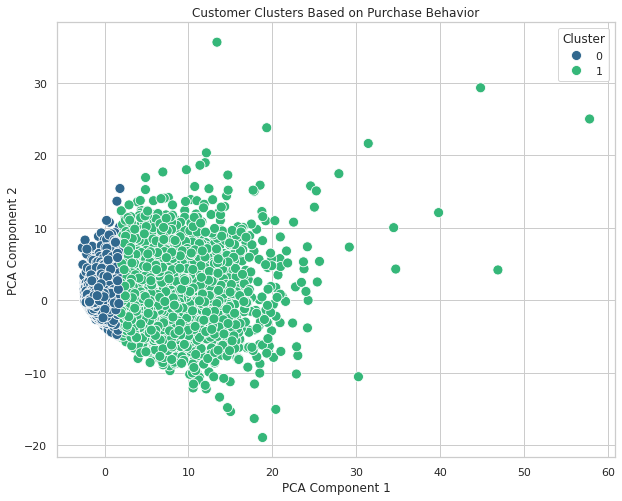

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
clustered_customer_product_matrix['PCA1'] = pca_components[:, 0]
clustered_customer_product_matrix['PCA2'] = pca_components[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster',
    data=clustered_customer_product_matrix, palette='viridis', s=100
)
plt.title('Customer Clusters Based on Purchase Behavior')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


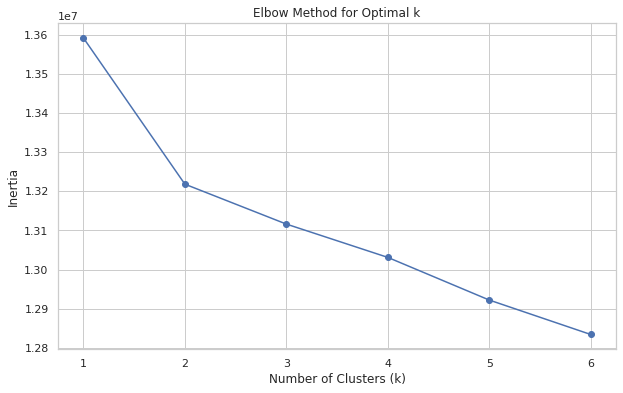

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of cluster numbers to test
inertia = []
k_values = range(1, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(scaled_data)  # Fit on your data
    inertia.append(kmeans.inertia_)  # Record the inertia

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)  # Show ticks for each k value
plt.grid(True)
plt.show()


In [ ]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=clustered_customer_product_matrix.columns[:-3])
cluster_centers

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0.004827,0.032947,0.001276,0.001391,0.062205,0.008205,0.066836,0.005022,0.001402,0.014801,...,0.057102,0.054276,0.023983,0.035268,0.008044,0.007608,0.009653,0.201174,0.008814,0.288121
1,0.015822,0.157807,0.008328,0.009091,0.442887,0.027481,0.297641,0.018806,0.004164,0.011659,...,0.278695,0.218876,0.131090,0.206315,0.029146,0.026856,0.044067,0.605552,0.012769,1.396669


In [ ]:
cluster_centers

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0.004827,0.032947,0.001276,0.001391,0.062205,0.008205,0.066836,0.005022,0.001402,0.014801,...,0.057102,0.054276,0.023983,0.035268,0.008044,0.007608,0.009653,0.201174,0.008814,0.288121
1,0.015822,0.157807,0.008328,0.009091,0.442887,0.027481,0.297641,0.018806,0.004164,0.011659,...,0.278695,0.218876,0.131090,0.206315,0.029146,0.026856,0.044067,0.605552,0.012769,1.396669


In [ ]:
# Step 1: Melt the DataFrame to make product names into rows
melted_df = cluster_centers.melt(var_name='product_name', value_name='value', ignore_index=False).reset_index()

# Step 2: Pivot so that the rows become columns
pivoted_df = melted_df.pivot(index='product_name', columns='index', values='value').reset_index()

# Step 3: Rename columns for clarity
pivoted_df.columns = ['product_name', 'Cluster0', 'Cluster1']

In [ ]:
sorted_df_0 = pivoted_df.sort_values(by='Cluster0', ascending=False)
sorted_df_0.head(10)


,product_name,Cluster0,Cluster1
50,fresh fruits,0.764006,3.231090
53,fresh vegetables,0.714511,3.060722
98,packaged vegetables fruits,0.366552,1.606523
133,yogurt,0.288121,1.396669
131,water seltzer sparkling water,0.201174,0.605552
93,packaged cheese,0.190257,0.995350
83,milk,0.182799,0.804650
25,chips pretzels,0.146336,0.675989
119,soy lactosefree,0.132098,0.574462
110,refrigerated,0.123180,0.501666


In [ ]:
sorted_df_1 = pivoted_df.sort_values(by='Cluster1', ascending=False)
sorted_df_1.head(10)

,product_name,Cluster0,Cluster1
50,fresh fruits,0.764006,3.231090
53,fresh vegetables,0.714511,3.060722
98,packaged vegetables fruits,0.366552,1.606523
133,yogurt,0.288121,1.396669
93,packaged cheese,0.190257,0.995350
83,milk,0.182799,0.804650
25,chips pretzels,0.146336,0.675989
131,water seltzer sparkling water,0.201174,0.605552
119,soy lactosefree,0.132098,0.574462
11,bread,0.114986,0.566620


In [ ]:
cluster_number = 0

# Select the row you want to unpivot
row_to_unpivot = cluster_centers.iloc[cluster_number]  # Change index as needed if it's not the first row

# Convert the selected row to a DataFrame to use `melt`
row_df = row_to_unpivot.to_frame().reset_index()

# Rename columns for clarity
row_df.columns = ['product_name', 'value']  # 'product_name' for original columns, 'value' for row values

#  sort by value column
row_df = row_df.sort_values(by='value', ascending=False)

# Reset the index
row_df.reset_index(drop=True, inplace=True)

# Show the result
print(row_df)


                      product_name     value
0                     fresh fruits  0.764006
1                 fresh vegetables  0.714511
2       packaged vegetables fruits  0.366552
3                           yogurt  0.288121
4    water seltzer sparkling water  0.201174
..                             ...       ...
129               kitchen supplies  0.002149
130                         beauty  0.001402
131            baby bath body care  0.001391
132               baby accessories  0.001276
133                   frozen juice  0.000942

[134 rows x 2 columns]


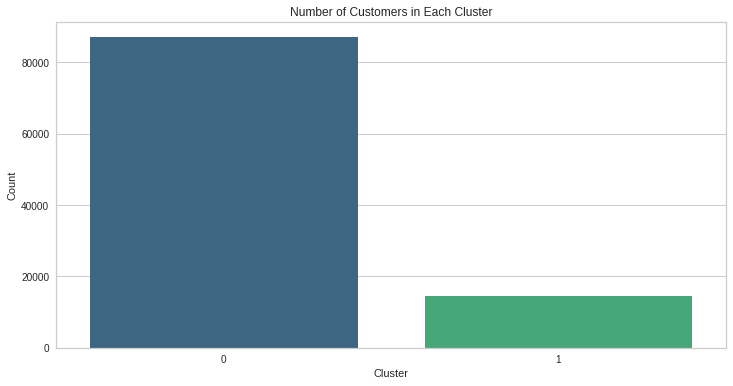

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=clustered_customer_product_matrix['Cluster'].value_counts().index,
            y=clustered_customer_product_matrix['Cluster'].value_counts().values,
            palette='viridis')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


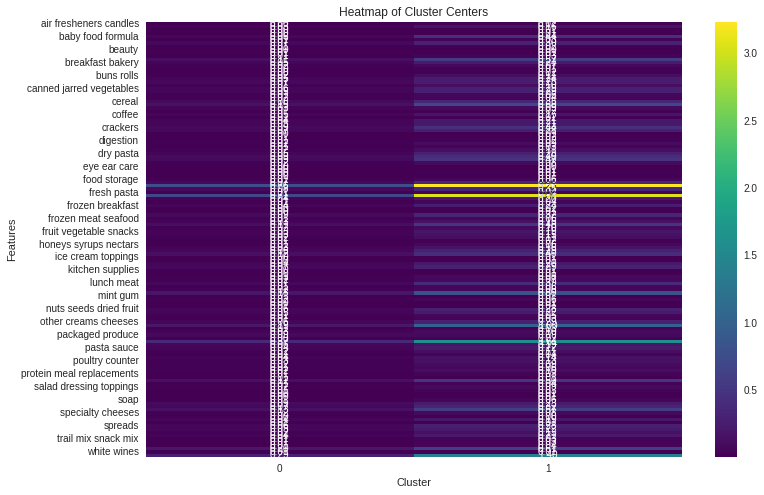

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers.T, cmap='viridis', annot=True, fmt=".2f")
plt.title('Heatmap of Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()


In [ ]:
cluster_summary = clustered_customer_product_matrix.groupby('Cluster').mean()


In [ ]:
cluster_summary.columns

Index(['air fresheners candles', 'asian foods', 'baby accessories',
       'baby bath body care', 'baby food formula', 'bakery desserts',
       'baking ingredients', 'baking supplies decor', 'beauty',
       'beers coolers',
       ...
       'spreads', 'tea', 'tofu meat alternatives', 'tortillas flat bread',
       'trail mix snack mix', 'trash bags liners', 'vitamins supplements',
       'water seltzer sparkling water', 'white wines', 'yogurt'],
      dtype='object', name='product_name', length=134)

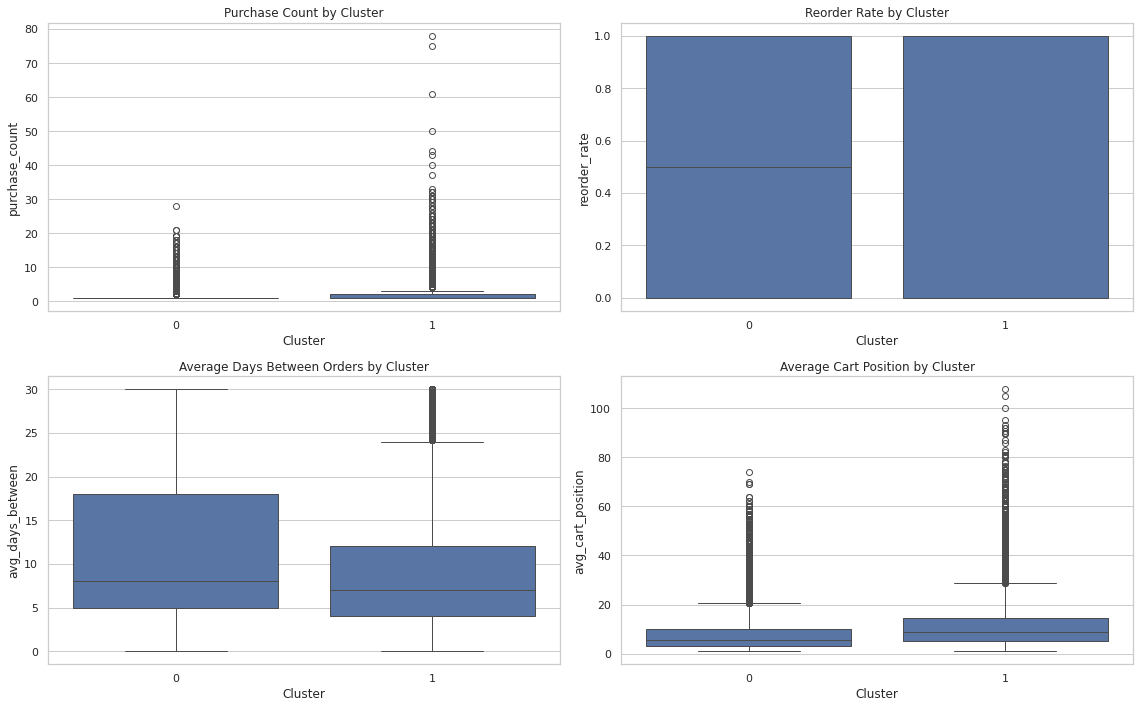

In [ ]:
# Create a DataFrame of cluster labels with user_id
cluster_labels = pd.DataFrame({
    'user_id': customer_product_matrix.index,
    'Cluster': customer_clusters
})
product_features = product_features.merge(cluster_labels, on='user_id')

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Plot each feature by Cluster
plt.subplot(2, 2, 1)
sns.boxplot(data=product_features, x='Cluster', y='purchase_count')
plt.title('Purchase Count by Cluster')

plt.subplot(2, 2, 2)
sns.boxplot(data=product_features, x='Cluster', y='reorder_rate')
plt.title('Reorder Rate by Cluster')

plt.subplot(2, 2, 3)
sns.boxplot(data=product_features, x='Cluster', y='avg_days_between')
plt.title('Average Days Between Orders by Cluster')

plt.subplot(2, 2, 4)
sns.boxplot(data=product_features, x='Cluster', y='avg_cart_position')
plt.title('Average Cart Position by Cluster')

plt.tight_layout()
plt.show()


### RULE MINING

#### Association Rule Mining WITH MLXTEND V2

In [ ]:
from sklearn.cluster import KMeans

product_counts = df['product_name'].value_counts()

top_products = product_counts.index[:50]
df_filtered = df[df['product_name'].isin(top_products)]
basket = df_filtered.pivot_table(index='order_id', columns='product_name', aggfunc='size', fill_value=0)
basket = basket.map(lambda x: 1 if x > 0 else 0).astype('int')
kmeans_rulemining = KMeans(n_clusters=2, random_state=42)

clusters = kmeans_rulemining.fit_predict(basket)

# Step 12: Add cluster labels to the basket DataFrame
basket['cluster'] = clusters

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

for cluster_num in basket['cluster'].unique():
    # Filter the data for the current cluster
    cluster_data = basket[basket['cluster'] == cluster_num].drop('cluster', axis=1)

    # Step 14: Apply the Apriori algorithm with min_support to generate frequent itemsets
    frequent_itemsets = apriori(cluster_data, min_support=0.005, use_colnames=True)

    # Step 15: Generate association rules with lower confidence threshold
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

    # Display the results for this cluster
    print(f"\nAssociation Rules for Cluster {cluster_num}:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

/home/arslanruslan/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Association Rules for Cluster 0:
           antecedents                   consequents   support  confidence  \
0  (baby food formula)                (fresh fruits)  0.022829    0.735471   
1  (baby food formula)            (fresh vegetables)  0.016808    0.541483   
2  (baby food formula)             (packaged cheese)  0.005997    0.193186   
3  (baby food formula)  (packaged vegetables fruits)  0.008559    0.275752   
4  (baby food formula)                      (yogurt)  0.007664    0.246894   

       lift  
0  1.127315  
1  0.961938  
2  1.706388  
3  1.292172  
4  1.720274  


/home/arslanruslan/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Association Rules for Cluster 1:
  antecedents                   consequents   support  confidence      lift
0     (bread)                        (milk)  0.006566    0.106949  1.098158
1     (bread)             (packaged cheese)  0.007257    0.118207  1.250789
2     (bread)  (packaged vegetables fruits)  0.008305    0.135287  0.972958
3     (bread)                      (yogurt)  0.007912    0.128882  1.052540
4    (cereal)                        (milk)  0.005183    0.121474  1.247309


#### RULE MINING WITH PYCARET  (skip) (not gonna work with PyCaret 3)

Can't really get it to run due to they dropped the module in v3 and even installing v2 leads to problem with packages

In [ ]:
!pip install pycaret

In [ ]:
!pip install pycaret==2.3.2

In [ ]:
from pycaret.arules import *

exp_arul101 = setup(data = df,
                    transaction_id = 'order_id',
                    item_id = 'product_name')

ModuleNotFoundError: No module named 'pycaret.arules'

### SETTING UP TRAINING FOR K-MEANS (skip)

In [ ]:
from sklearn.model_selection import train_test_split

# now we import clustering
from pycaret.clustering import *

full_set_of_features = [
    'order_id', 'user_id',
    'order_number', 'order_dow',
    'order_hour_of_day', 'days_since_prior_order',
    'product_id', 'add_to_cart_order',
    'reordered', 'department_id'

      # we have ids, we don't need to use encoded fields, keeping here commented for a remark
      #  'product_name_encoded', 'department_encoded'
]

reduced_set = ['user_id', 'product_id', 'department_id']

# selected_features = full_set_of_features
selected_features = reduced_set

selected_features_df = df[selected_features]
selected_features_df

,user_id,product_id,department_id
794506,152060,115,7
1900056,44755,37,1
1986766,169119,123,4
794368,162421,117,19
1623032,172693,17,13
...,...,...,...
947634,171256,50,19
1378845,27596,67,20
1069258,113290,83,4
438720,24736,78,19


In [ ]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.mosaicplot as mp

s = setup(selected_features_df, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1009750, 3)"
2,Transformed data shape,"(1009750, 3)"
3,Numeric features,3
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


### CLUSTERING EXPERIMENT (skip)

In [ ]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [ ]:
# init setup on exp
exp.setup(selected_features_df, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1009750, 3)"
2,Transformed data shape,"(1009750, 3)"
3,Numeric features,3
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# train kmeans model
kmeans = create_model('kmeans')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:52:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 4 Clusters
Estimator,. . . . . . . . . . . . . . . . . .,K-Means Clustering


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KeyboardInterrupt: 

Silhouette Score (0.5502):

    The Silhouette score ranges from -1 to 1, where values closer to 1 indicate well-defined and dense clusters.
    A score of 0.5502 suggests moderately good clustering. This means that the clusters are reasonably distinct, but there could be some overlap or less clear separation between some clusters. It's a decent score but may not be perfect.

Calinski-Harabasz Index (94949.1673):

    This index measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values indicate better-defined clusters.
    94949.1673 is a very high value, suggesting that the clusters are well-separated. This aligns with the clear segmentation seen in the PCA plot.

Davies-Bouldin Index (0.5298):

    The Davies-Bouldin index measures the average similarity ratio between each cluster and the one that is most similar to it. Lower values are better, indicating less similarity (better separation).
    0.5298 is a good score, suggesting that the clusters are well-separated and distinct from each other.

Homogeneity (0):

    Homogeneity is a measure of how well the clusters contain only members of a single class. It ranges from 0 to 1, with 1 being perfect homogeneity.
    0 indicates that there is no clear class structure or labels in the clusters. If you are clustering unlabeled data, this is normal, but if you had labeled data and expected the clusters to match those labels, this score would indicate a poor match.

Rand Index (0):

    The Rand Index compares how well the clustering aligns with actual labels (if available). It ranges from 0 to 1, with 1 being a perfect match.
    0 indicates no agreement with true labels, suggesting that either the dataset does not have clear labeling or the clusters do not correspond well to those labels.

Completeness (0):

    Completeness measures if all members of a given class are assigned to the same cluster. Similar to homogeneity, it ranges from 0 to 1.
    0 indicates that there is no clear match of the data points to any specific class or that the clusters do not encapsulate complete class structures.

In [ ]:
kmeans_labels = assign_model(kmeans)
kmeans_labels

In [ ]:
# concat df and kmeans_labels['cluster']
df_cluster = pd.concat([kmeans_labels['Cluster'], df], axis=1)
df_cluster

In [ ]:
cluster0.product_name.unique()

array(['water seltzer sparkling water', 'lunch meat', 'fresh fruits',
       'chips pretzels', 'fresh vegetables', 'cream',
       'nuts seeds dried fruit', 'frozen meals',
       'packaged vegetables fruits', 'packaged cheese',
       'fresh dips tapenades', 'soap', 'coffee', 'refrigerated',
       'canned fruit applesauce', 'cat food care',
       'grains rice dried goods', 'energy granola bars',
       'baby food formula', 'candy chocolate', 'fresh herbs',
       'packaged produce', 'yogurt', 'eggs', 'oils vinegars',
       'canned meals beans', 'crackers', 'hot cereal pancake mixes',
       'bread', 'hot dogs bacon sausage', 'juice nectars',
       'fruit vegetable snacks', 'meat counter', 'spices seasonings',
       'instant foods', 'milk', 'poultry counter', 'ice cream ice',
       'canned meat seafood', 'frozen produce', 'beers coolers',
       'condiments', 'latino foods', 'kosher foods',
       'tofu meat alternatives', 'canned jarred vegetables',
       'packaged poultry', 'p

In [ ]:
cluster0 = df_cluster[kmeans_labels['Cluster'] == 'Cluster 0']
# print distinct values of product_name
print(cluster0['product_name'].unique())



['water seltzer sparkling water' 'lunch meat' 'fresh fruits'
 'chips pretzels' 'fresh vegetables' 'cream' 'nuts seeds dried fruit'
 'frozen meals' 'packaged vegetables fruits' 'packaged cheese'
 'fresh dips tapenades' 'soap' 'coffee' 'refrigerated'
 'canned fruit applesauce' 'cat food care' 'grains rice dried goods'
 'energy granola bars' 'baby food formula' 'candy chocolate' 'fresh herbs'
 'packaged produce' 'yogurt' 'eggs' 'oils vinegars' 'canned meals beans'
 'crackers' 'hot cereal pancake mixes' 'bread' 'hot dogs bacon sausage'
 'juice nectars' 'fruit vegetable snacks' 'meat counter'
 'spices seasonings' 'instant foods' 'milk' 'poultry counter'
 'ice cream ice' 'canned meat seafood' 'frozen produce' 'beers coolers'
 'condiments' 'latino foods' 'kosher foods' 'tofu meat alternatives'
 'canned jarred vegetables' 'packaged poultry' 'paper goods'
 'frozen pizza' 'soft drinks' 'cleaning products' 'soy lactosefree'
 'soup broth bouillon' 'baking ingredients' 'spreads'
 'frozen breads dou

In [ ]:
cluster1 = df_cluster[kmeans_labels['Cluster'] == 'Cluster 1']
# print distinct values of product_name
print(cluster1['product_name'].unique())


['ice cream ice' 'baking ingredients' 'packaged cheese' 'poultry counter'
 'cereal' 'fresh fruits' 'soy lactosefree' 'packaged vegetables fruits'
 'frozen appetizers sides' 'prepared meals' 'canned meals beans'
 'frozen pizza' 'frozen meals' 'butter' 'chips pretzels'
 'energy granola bars' 'canned jarred vegetables' 'yogurt' 'paper goods'
 'baby bath body care' 'spices seasonings' 'frozen breads doughs'
 'dry pasta' 'more household' 'refrigerated' 'hot dogs bacon sausage'
 'fresh herbs' 'candy chocolate' 'fresh vegetables' 'packaged produce'
 'frozen vegan vegetarian' 'soft drinks' 'nuts seeds dried fruit'
 'canned fruit applesauce' 'air fresheners candles' 'coffee' 'eggs'
 'laundry' 'water seltzer sparkling water' 'crackers'
 'fresh dips tapenades' 'tofu meat alternatives'
 'hot cereal pancake mixes' 'cream' 'soap' 'tea' 'frozen produce'
 'missing' 'pickled goods olives' 'soup broth bouillon' 'breakfast bakery'
 'lunch meat' 'milk' 'preserved dips spreads' 'cocoa drink mixes'
 'frozen

In [ ]:
cluster2 = df_cluster[kmeans_labels['Cluster'] == 'Cluster 2']
# print distinct values of product_name
print(cluster2['product_name'].unique())

['nuts seeds dried fruit' 'ice cream ice' 'milk' 'frozen meals'
 'fresh fruits' 'refrigerated' 'packaged vegetables fruits'
 'baby food formula' 'fresh vegetables' 'granola' 'cookies cakes'
 'soft drinks' 'hot dogs bacon sausage' 'fresh dips tapenades'
 'energy sports drinks' 'yogurt' 'facial care' 'eggs' 'chips pretzels'
 'hair care' 'canned jarred vegetables' 'frozen meat seafood' 'bread'
 'canned meals beans' 'cereal' 'prepared meals' 'soup broth bouillon'
 'fresh herbs' 'canned fruit applesauce' 'frozen appetizers sides'
 'fruit vegetable snacks' 'packaged cheese' 'other creams cheeses'
 'coffee' 'water seltzer sparkling water' 'grains rice dried goods'
 'crackers' 'paper goods' 'candy chocolate' 'juice nectars'
 'breakfast bakery' 'cream' 'packaged produce' 'condiments' 'lunch meat'
 'frozen breakfast' 'baking ingredients' 'popcorn jerky' 'frozen produce'
 'body lotions soap' 'dry pasta' 'instant foods' 'vitamins supplements'
 'food storage' 'soy lactosefree' 'packaged meat' 'spre

In [ ]:
cluster3 = df_cluster[kmeans_labels['Cluster'] == 'Cluster 3']
# print distinct values of product_name
print(cluster3['product_name'].unique())

['packaged vegetables fruits' 'dish detergents' 'fresh vegetables' 'eggs'
 'paper goods' 'canned fruit applesauce' 'bread' 'fresh fruits'
 'candy chocolate' 'oils vinegars' 'salad dressing toppings'
 'packaged cheese' 'dry pasta' 'muscles joints pain relief' 'yogurt'
 'hot dogs bacon sausage' 'chips pretzels' 'frozen breakfast' 'milk'
 'fresh herbs' 'breakfast bakery' 'water seltzer sparkling water'
 'cookies cakes' 'soup broth bouillon' 'asian foods' 'baking ingredients'
 'frozen produce' 'cleaning products' 'soft drinks' 'packaged produce'
 'energy granola bars' 'canned meals beans' 'hot cereal pancake mixes'
 'tea' 'baby accessories' 'crackers' 'soy lactosefree'
 'frozen appetizers sides' 'juice nectars' 'packaged poultry'
 'tofu meat alternatives' 'baby food formula' 'soap' 'butter'
 'nuts seeds dried fruit' 'fresh dips tapenades' 'lunch meat' 'mint gum'
 'ice cream ice' 'frozen meals' 'laundry' 'spreads' 'frozen meat seafood'
 'white wines' 'latino foods' 'missing' 'other creams c

In [ ]:
from pycaret.clustering import predict_model

# Assume `kmeans` is your trained model and `new_data` is the DataFrame with user features
# Prepare the new user data (make sure it has the same structure as training data)

target_user_id = 152060
user_data = df[df['user_id'] == target_user_id]
cluster_prediction = predict_model(kmeans, data=user_data)
cluster_name = cluster_prediction['Cluster'].values[0]
cluster_data = df_cluster[ kmeans_labels['Cluster'] == cluster_name ]

print("Bought: " + user_data['product_name'].unique())
print("Recommended product: " + cluster_data['product_name'].unique())

In [ ]:
# k-means but with settings
# kmeans = create_model('kmeans', n_init=5)

In [ ]:
save_model(kmeans, '/mnt/c/Projects/shinysht/kmeans_model')

#### MiniBatchKMeans

In [ ]:
# another way to train in batches
# from sklearn.cluster import MiniBatchKMeans
# kmeans = MiniBatchKMeans(n_clusters=5, batch_size=100000)
# kmeans.fit(selected_features_df)

In [ ]:
# selected_features_df.drop(columns=['cluster'], inplace=True)
labels = kmeans.predict(selected_features_df)
cluster_centers = kmeans.cluster_centers_

df_cluster = selected_features_df.copy()
df_cluster['cluster'] = labels

In [ ]:
df_cluster.head(100)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_cluster['department_id'], df_cluster['product_id'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red')  # Plot cluster centers
plt.show()

In [ ]:
plt.scatter(df_cluster['user_id'], df_cluster['product_id'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red')  # Plot cluster centers
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming `data` is your dataset
# Example data (replace with your actual data)
# data = np.array([[...], [...], ...])

# Apply KMeans
# kmeans = KMeans(n_clusters=4, random_state=42)
# kmeans.fit(data)

# Get cluster labels
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(4):
    # Separate data points by their cluster labels
    cluster_data = selected_features_df[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

### DBSCAN

In [ ]:
## DBSCAN Algorithm
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming customer_product_matrix is your DataFrame
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_product_matrix)

# Apply DBSCAN clustering
epsilon = 3.5  # Distance threshold for clustering
min_samples = 250  # Minimum number of samples in a neighborhood to form a cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan


DBSCAN(eps=3.5, min_samples=250)

In [ ]:
# Fit DBSCAN and get cluster labels
customer_clusters = dbscan.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
customer_product_matrix['Cluster'] = customer_clusters

# Display the first few rows of the updated DataFrame
print(customer_product_matrix.head())

product_name  air fresheners candles  asian foods  baby accessories  \
user_id                                                               
2                                0.0          0.0               0.0   
3                                0.0          0.0               0.0   
7                                0.0          0.0               0.0   
10                               0.0          0.0               0.0   
11                               0.0          0.0               0.0   

product_name  baby bath body care  baby food formula  bakery desserts  \
user_id                                                                 
2                             0.0                0.0              0.0   
3                             0.0                0.0              0.0   
7                             0.0                0.0              0.0   
10                            0.0                0.0              0.0   
11                            0.0                0.0            

In [ ]:
print(customer_product_matrix['Cluster'].value_counts())


Cluster
-1    68262
 0    31522
 1      468
 3      307
 4      304
 5      287
 2      279
Name: count, dtype: int64


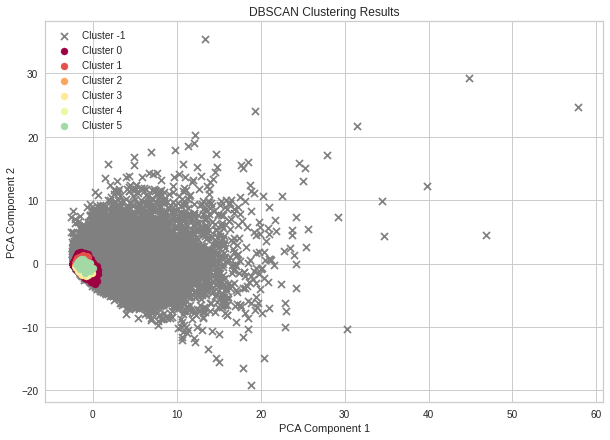

In [ ]:
## Plot DBSCAN Clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Assuming 'customer_product_matrix' has a 'Cluster' column from DBSCAN
# Reduce dimensions to 2 for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Extract cluster labels from the DBSCAN result
cluster_labels = customer_product_matrix['Cluster']

# Get unique clusters, including noise (-1 label)
unique_labels = np.unique(cluster_labels)

# Plot each cluster with a unique color
plt.figure(figsize=(10, 7))
for label in unique_labels:
    # Separate data points by cluster label
    cluster_data = reduced_data[cluster_labels == label]

    # Define color and marker for noise points
    color = 'gray' if label == -1 else plt.cm.Spectral(label / len(unique_labels))
    marker = 'x' if label == -1 else 'o'

    # Scatter plot for each cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1],
                s=50, c=[color], marker=marker, label=f'Cluster {label}')

# Add title and legend
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assume 'customer_product_matrix' is your data without any cluster labels
data = customer_product_matrix.copy()

# Filter out the outliers (labeled as -1 by DBSCAN)
mask = cluster_labels != -1
filtered_data = data[mask]
filtered_labels = cluster_labels[mask]

# Calculate the silhouette score
if len(set(filtered_labels)) > 1:  # Ensure there is more than 1 cluster
    silhouette_avg = silhouette_score(filtered_data, filtered_labels)
    print(f"Silhouette Score for DBSCAN clustering: {silhouette_avg}")
else:
    print("Not enough clusters to calculate a silhouette score.")


Silhouette Score for DBSCAN clustering: 0.04738553429562304


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Adjust components as needed
reduced_data = pca.fit_transform(customer_product_matrix)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clustering.fit(reduced_data)  # Apply to your data (or PCA-reduced data)

cluster_labels = clustering.labels


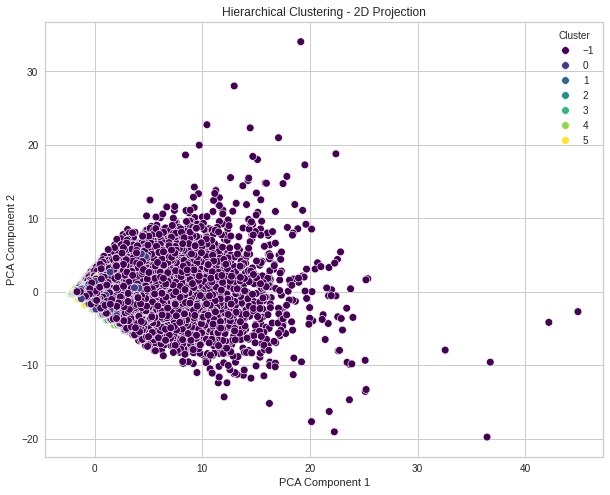

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Optional: Reduce dimensions for plotting
pca = PCA(n_components=2)
data_2d = pca.fit_transform(reduced_data)

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=cluster_labels, palette="viridis", s=60)
plt.title("Hierarchical Clustering - 2D Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


### INERTIA

It is a metric that tells you how "tight" the clusters are: lower inertia means that the points are closer to their respective cluster centers, which typically indicates better clustering.

In [ ]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 12834462.836193299


### Analyze Model - PLOTTING K-MEANS (skip)

In [ ]:
from pycaret.clustering import *

# Assuming your clustering model is already created (e.g., `kmeans`)
# Assign the clusters to the original dataset
clustered_data = assign_model(kmeans)

# Display the first few rows to see how clusters are assigned
print(clustered_data.head())

ChadGPT preliminary observations:

This plot suggests that the clusters identified by KMeans, when visualized using PCA (Principal Component Analysis), are well-separated, but the data appears to be evenly split into four broad vertical bands. Here are a few observations:

Clear Clusters (Vertical Stripes):

    The clusters are shown as distinct vertical stripes, each colored differently. This indicates that KMeans has effectively segmented the data into four clusters.
    However, the equal width and separation of the bands suggest that the clusters might be very similar in shape and size, which could mean the algorithm created clusters of similar density.

Principal Component Interpretation:

    Since this is a PCA plot, the data has been reduced to two principal components to visualize it. The vertical stripe pattern could indicate that the features primarily driving the clustering are distinguishing between certain data ranges, leading to this segmented appearance.
    The clear separation hints that KMeans was able to find a pattern, but it may also indicate that the clusters are not nuanced and are driven by one or two dominating features.    

Possible Over-Simplification:

    The vertical pattern could suggest that KMeans is primarily clustering based on one dominant feature (or feature combination), leading to this sharp segmentation. If the real data is more complex, you might be losing some underlying structure.
    Consider reviewing the feature importance to see if one feature is dominating the clustering process.

Recommendations:

    Feature Scaling/Normalization: Ensure your data is well-scaled, as KMeans can be sensitive to feature magnitudes. Normalizing can lead to more meaningful clusters.
    Review Cluster Assignments: Check the data points within each cluster to see if the segmentation makes sense from a business or practical perspective.
    Investigate Features: Consider inspecting the original features driving each principal component to understand what aspects are influencing the clusters the most. This might give insights into how the data is being grouped.

It seems KMeans did its job, but you might want to further analyze why the clusters ended up so cleanly divided—there could be more insights hiding in the feature space!

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
pca_result = pca.fit_transform(selected_features_df)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualized with PCA')
plt.colorbar(label='Cluster')
plt.show()

NameError: name 'selected_features_df' is not defined

In [ ]:
loadings = pca.components_
num_features = pca.n_features_in_
feature_names = selected_features_df.columns  # Replace with your feature names

pc_loadings = pd.DataFrame(loadings, columns=feature_names, index=['PC1', 'PC2'])
print(pc_loadings)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.heatmap(pc_loadings, annot=True, cmap='viridis')
plt.title('PCA Loadings')
plt.show()

In [ ]:
plot_model(kmeans, plot = 'cluster')

In [ ]:
plot_model(kmeans, plot='distribution')

In [ ]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

In [ ]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

#### Cluster Centers

In [ ]:
import pandas as pd

# Assuming you have the trained model and column names
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=selected_features_df.columns[:-1])
print(cluster_centers)

#### Feature distribution

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster labels to your DataFrame
selected_features_df['cluster'] = kmeans.predict(selected_features_df.drop('cluster', axis=1))

# Plotting box plots for each feature in each cluster
for column in selected_features_df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=column, data=selected_features_df)
    plt.title(f'Distribution of {column} by Cluster')
    plt.show()

### TRAINING WITH FOCUS ON CUSTOMERS (skip, draft, no in final)


In [ ]:

# user_order_stats = df.groupby('user_id').agg(
#     total_orders=('order_number', 'max'),
#     avg_days_between_orders=('days_since_prior_order', 'mean'),
#     days_since_last_order=('days_since_prior_order', 'max')
# ).reset_index()

user_summary_df = df.groupby('user_id').agg(
    total_orders=('order_id', 'count'),
    reorder_rate=('reordered', 'mean'),
    avg_days_between_orders=('days_since_prior_order', 'mean')
).reset_index()

Assess Product Preferences:

Most Commonly Ordered Products: Determine the most frequently purchased products per user.
Unique Products Ordered: Count the number of unique products each user has ordered.
Average Cart Size: Calculate the average number of items added to the cart for each user.

In [ ]:
# # Calculate Reordering Behavior:

# user_reorder_stats = df.groupby('user_id').agg(
#     reorder_rate=('reordered', 'mean'),
#     most_common_reorder_day=('order_dow', lambda x: x.mode()[0])
# ).reset_index()

product_summary_df = df.groupby('user_id').agg(
    most_common_product=('product_id', lambda x: x.mode()[0]),  # Most frequently purchased product
    unique_products_ordered=('product_id', 'nunique'),
    avg_cart_size=('add_to_cart_order', 'mean')
).reset_index()

Summarize Reordering Behavior:

Average Reorder Position: Calculate the average position of items in the cart when reordered.
Days Since Last Order: Determine the number of days since the user last placed an order.

In [ ]:
# # Summarizing cart behaviour

# user_cart_stats = df.groupby('user_id').agg(
#     avg_cart_size=('add_to_cart_order', 'mean'),
#     median_reorder_position=('add_to_cart_order', lambda x: x.median())
# ).reset_index()

reorder_summary_df = df.groupby('user_id').agg(
    avg_reorder_position=('add_to_cart_order', 'mean'),  # Position of reordered products
    days_since_last_order=('days_since_prior_order', 'max')  # Last order days
).reset_index()


Time-Based Preferences:

Most Common Order Hour: Identify the hour of the day when the user most frequently places orders.
Order Frequency by Day of Week: Analyze how often users order on specific days of the week.

In [ ]:
# # Assesing product diversity

# user_product_stats = df.groupby('user_id').agg(
#     num_unique_products=('product_id', 'nunique'),
#     top_departments=('department', lambda x: x.mode()[0])
# ).reset_index()

time_summary_df = df.groupby('user_id').agg(
    most_common_order_hour=('order_hour_of_day', lambda x: x.mode()[0]),  # Most frequent order hour
    order_frequency_by_dow=('order_dow', lambda x: x.value_counts().idxmax())  # Most frequent day of the week
).reset_index()

In [ ]:
# # Time based ordering patterns

# user_time_stats = df.groupby('user_id').agg(
#     most_frequent_order_hour=('order_hour_of_day', lambda x: x.mode()[0]),
#     order_time_range=('order_hour_of_day', lambda x: x.max() - x.min())
# ).reset_index()

In [ ]:
# Combined aggregation
# user_summary_df = (
#     user_order_stats
#     .merge(user_reorder_stats, on='user_id')
#     .merge(user_cart_stats, on='user_id')
#     .merge(user_product_stats, on='user_id')
#     .merge(user_time_stats, on='user_id')
# )

user_profile_df = pd.merge(user_summary_df, product_summary_df, on='user_id')
user_profile_df = pd.merge(user_profile_df, reorder_summary_df, on='user_id')
user_profile_df = pd.merge(user_profile_df, time_summary_df, on='user_id')



In [ ]:
from pycaret.clustering import *
import pandas as pd
clustering_setup = setup(data=user_profile_df,
                         session_id=123,  # Random seed for reproducibility
                         normalize=True,  # Optional: Normalize features
                        )  # Suppress setup output

from pycaret.clustering import *
import pandas as pd

clustering_setup = setup(data=user_profile_df,
                         session_id=123,
                         normalize=True)

,Description,Value
0,Session id,123
1,Original data shape,"(16959, 11)"
2,Transformed data shape,"(16959, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Description,Value
0,Session id,123
1,Original data shape,"(16959, 11)"
2,Transformed data shape,"(16959, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [ ]:
# Choose and create clusters
kmeans_model = create_model('kmeans', num_clusters=5)  # Specify the number of clusters you want

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1429,2898.4164,1.8651,0,0,0


In [ ]:
# Assign clusters to your data
clustered_data = assign_model(kmeans_model)

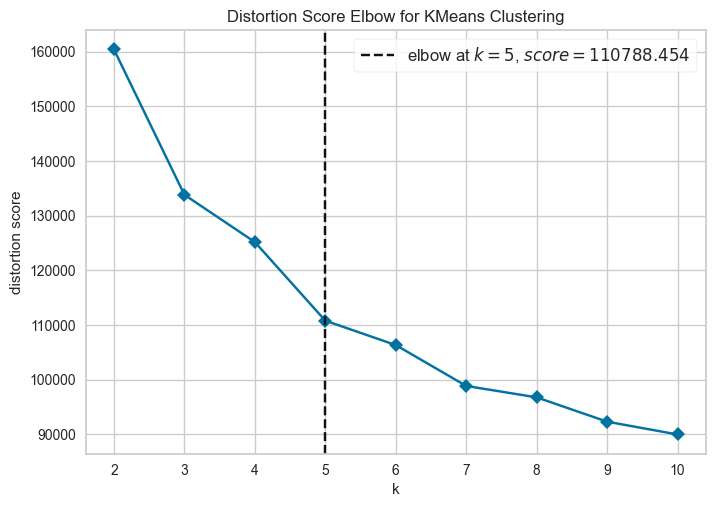

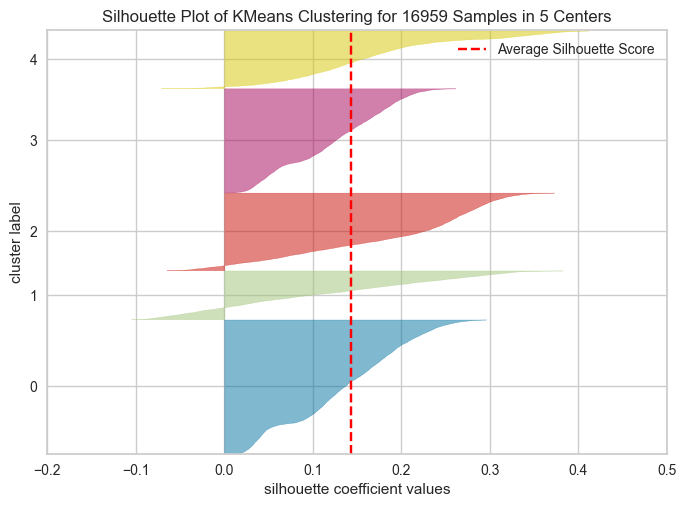

In [ ]:
#Analyze cluster results
plot_model(kmeans_model, plot='elbow')  # Elbow method to find the optimal number of clusters
plot_model(kmeans_model, plot='silhouette')  # Silhouette plot to evaluate cluster separation

In [ ]:
# Interpret results
# Check the data types in the clustered_data DataFrame
print(clustered_data.dtypes)

# Separate numeric columns
numeric_columns = clustered_data.select_dtypes(include=['number']).columns
categorical_columns = clustered_data.select_dtypes(include=['object']).columns

# Perform aggregation on numeric columns
cluster_summary_numeric = clustered_data.groupby('Cluster')[numeric_columns].mean()

# Optional: Handle categorical data (e.g., getting the most frequent category)
cluster_summary_categorical = clustered_data.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])

# Combine the results if necessary
cluster_summary = pd.concat([cluster_summary_numeric, cluster_summary_categorical], axis=1)

# Display the aggregated summaries
print(cluster_summary)


user_id                      int32
total_orders                  int8
reorder_rate               float32
avg_days_between_orders    float32
most_common_product          int32
unique_products_ordered       int8
avg_cart_size              float32
avg_reorder_position       float32
days_since_last_order      float32
most_common_order_hour        int8
order_frequency_by_dow        int8
Cluster                     object
dtype: object
                 user_id  total_orders  reorder_rate  avg_days_between_orders  \
Cluster                                                                         
Cluster 0  104796.089879      1.012256      0.684958                 6.861374   
Cluster 1  102788.939796      1.055612      0.401020                10.422704   
Cluster 2  104819.193714      1.037845      0.494708                26.696119   
Cluster 3  103355.327673      1.007893      0.543411                 6.165630   
Cluster 4  102248.318359      2.257019      0.651687                 8.867091   

In [ ]:
# Check for missing values
user_profile_df.isnull().sum()

# Drop or fill missing values if necessary
user_profile_df.fillna(0, inplace=True)  # Example of filling missing values with 0

# Select relevant numerical features for clustering
clustering_features = user_profile_df[['total_orders', 'reorder_rate', 'avg_days_between_orders',
                                        'unique_products_ordered', 'avg_cart_size',
                                        'avg_reorder_position', 'days_since_last_order']]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)


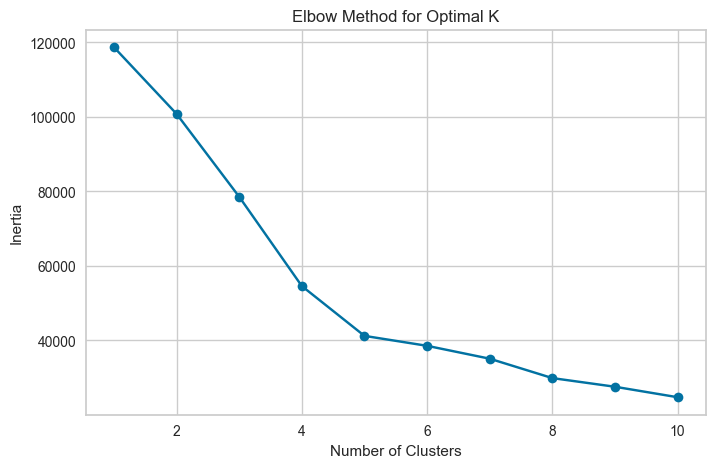

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Set the optimal number of clusters (e.g., 4 based on the elbow method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=123)
user_profile_df['Cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
cluster_summary = user_profile_df.groupby('Cluster').mean()
print(cluster_summary)


               user_id  total_orders  reorder_rate  avg_days_between_orders  \
Cluster                                                                       
0        104149.848593      1.012991      0.999227                 7.463811   
1        103876.829028      1.006931      0.038017                 5.879122   
2        104764.525223      1.048071      0.482047                26.787685   
3        101780.711262      2.251905      0.648245                 8.634766   

         most_common_product  unique_products_ordered  avg_cart_size  \
Cluster                                                                
0                  71.083514                 1.000000       6.022812   
1                  70.745852                 1.000000       9.252783   
2                  68.958160                 1.040059       8.256083   
3                  48.011008                 2.196020       9.974852   

         avg_reorder_position  days_since_last_order  most_common_order_hour  \
Cluster     

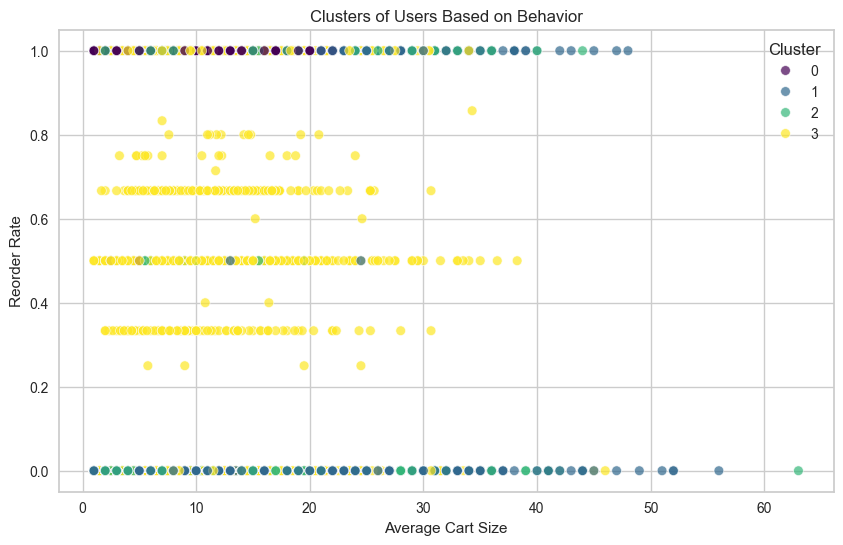

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_profile_df, x='avg_cart_size', y='reorder_rate', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters of Users Based on Behavior')
plt.xlabel('Average Cart Size')
plt.ylabel('Reorder Rate')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Using the Aggregated Features for Recommendations
Collaborative Filtering:

Use the user profile DataFrame to create a collaborative filtering model, where you can recommend products based on similar user behaviors.
Content-Based Filtering:

Analyze the most common products and their categories to recommend similar products to users based on their past purchases.
Association Rules:

Use the aggregated data to identify associations between products (e.g., customers who buy A often buy B), which can inform recommendation engines.
Personalized Marketing:

Create targeted marketing campaigns based on the time-based preferences, such as sending promotions for frequently ordered products during the hours or days users are most active.



Implications for Product Recommendations
Frequent Shoppers (Cluster 3):

Target these users with loyalty programs and personalized product recommendations based on their previous purchases since they are likely to buy more often and may appreciate exclusive deals.
Occasional Shoppers (Clusters 0, 1, and 2):

Use retargeting ads or email campaigns to remind them of products they viewed or purchased previously. Since Cluster 1 has longer gaps between orders, consider special promotions or discounts to incentivize them to return.
Product Diversity:

For users in Cluster 0, who typically order the same product, consider suggesting complementary products or alternatives that are frequently bought together to increase their cart size.
For Cluster 2, focus on bundling products together as they are more open to larger purchases.
Engagement Strategy:

Users from Cluster 1 could benefit from targeted campaigns highlighting new arrivals or bestsellers, which could attract their interest and encourage them to place an order.
Timing Strategies:

Since most clusters order around the same hour, consider scheduling promotions or special offers during these hours to maximize engagement and conversion rates. **bold text**

 Product recommendations based on user behavior and product interactions, you'll want to aggregate your features in a way that captures both individual user preferences and broader trends in product purchases.

In [ ]:
import pandas as pd

# Sample data creation (you will replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your dataset

# Step 1: Product Purchase Frequency
product_purchase_frequency = df.groupby('product_id').size().reset_index(name='purchase_count')

# Step 2: Co-Purchase Patterns (Co-occurrence Matrix)
co_occurrence_matrix = pd.crosstab(df['order_id'], df['product_id'])

# Step 3: User-Specific Product Interaction
user_product_interaction = df.groupby('user_id')['product_id'].nunique().reset_index(name='unique_products_ordered')

# Step 4: Average Days Between Purchases for Each Product
# Ensure the 'days_since_prior_order' is numeric and not null
df['days_since_prior_order'] = pd.to_numeric(df['days_since_prior_order'], errors='coerce')

avg_days_between = df.groupby('product_id')['days_since_prior_order'].mean().reset_index(name='avg_days_between_purchases')

# Step 5: User Purchase Patterns Over Time
purchase_time_patterns = df.groupby(['product_id', 'order_dow', 'order_hour_of_day']).size().reset_index(name='frequency')

# Step 6: Reorder Rate for Each Product
reorder_rate = df.groupby('product_id')['reordered'].mean().reset_index(name='reorder_rate')

# Step 7: Average Cart Size for Each Product
avg_cart_size = df.groupby('product_id')['add_to_cart_order'].mean().reset_index(name='avg_cart_size')

# Step 8: Total Revenue Generated by Product (assuming you have a revenue column)
# If you have a price column (e.g., 'price'), you can calculate total revenue:
# df['total_price'] = df['price'] * df['add_to_cart_order']  # This line is optional depending on your data
# total_revenue = df.groupby('product_id')['total_price'].sum().reset_index(name='total_revenue')

# Step 9: Segment Users by Purchase Behavior
user_segments = df.groupby('user_id').agg(
    total_orders=('order_id', 'count'),
    avg_cart_size=('add_to_cart_order', 'mean'),
    avg_days_between_orders=('days_since_prior_order', 'mean')
).reset_index()

# Merge all aggregated DataFrames into a final summary DataFrame for recommendations
recommendation_summary = product_purchase_frequency.merge(
    reorder_rate, on='product_id', how='left'
).merge(
    avg_days_between, on='product_id', how='left'
).merge(
    avg_cart_size, on='product_id', how='left'
).merge(
    purchase_time_patterns, on='product_id', how='left'
).merge(
    user_product_interaction, left_on='product_id', right_index=True, how='left'
)

# Display the final recommendation summary DataFrame
print(recommendation_summary.head())


   product_id  purchase_count  reorder_rate  avg_days_between_purchases  \
0           1              41      0.609756                    11.95122   
1           1              41      0.609756                    11.95122   
2           1              41      0.609756                    11.95122   
3           1              41      0.609756                    11.95122   
4           1              41      0.609756                    11.95122   

   avg_cart_size  order_dow  order_hour_of_day  frequency  user_id  \
0       8.487805          0                  9          1       75   
1       8.487805          0                 11          1       75   
2       8.487805          0                 13          1       75   
3       8.487805          0                 14          1       75   
4       8.487805          0                 15          2       75   

   unique_products_ordered  
0                        1  
1                        1  
2                        1  
3           

In [ ]:
from pycaret.clustering import *
import pandas as pd
clustering_setup = setup(data=recommendation_summary,
                         session_id=123,  # Random seed for reproducibility
                         normalize=True,  # Optional: Normalize features
                        )  # Suppress setup output

,Description,Value
0,Session id,123
1,Original data shape,"(7160, 10)"
2,Transformed data shape,"(7160, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [ ]:
# Choose and create clusters
kmeans_model = create_model('kmeans', num_clusters=5)  # Specify the number of clusters you want

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1958,1314.4930,1.5524,0,0,0


In [ ]:
# Assign clusters to your data
clustered_data = assign_model(kmeans_model)

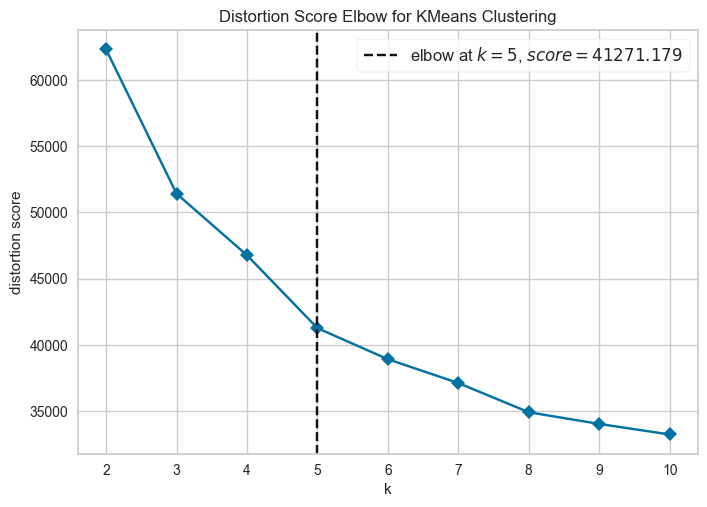

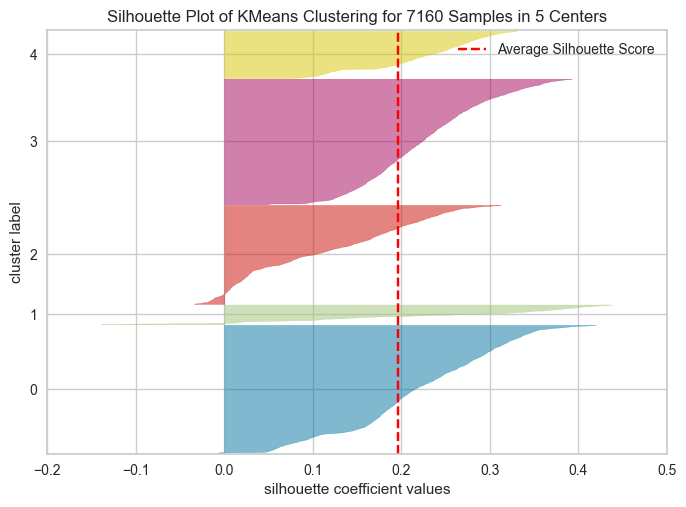

In [ ]:
#Analyze cluster results
plot_model(kmeans_model, plot='elbow')  # Elbow method to find the optimal number of clusters
plot_model(kmeans_model, plot='silhouette')  # Silhouette plot to evaluate cluster separation

In [ ]:
# Interpret results
# Check the data types in the clustered_data DataFrame
print(clustered_data.dtypes)

# Separate numeric columns
numeric_columns = clustered_data.select_dtypes(include=['number']).columns
categorical_columns = clustered_data.select_dtypes(include=['object']).columns

# Perform aggregation on numeric columns
cluster_summary_numeric = clustered_data.groupby('Cluster')[numeric_columns].mean()

# Optional: Handle categorical data (e.g., getting the most frequent category)
cluster_summary_categorical = clustered_data.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])

# Combine the results if necessary
cluster_summary = pd.concat([cluster_summary_numeric, cluster_summary_categorical], axis=1)

# Display the aggregated summaries
print(cluster_summary)


product_id                      int32
purchase_count                  int32
reorder_rate                  float32
avg_days_between_purchases    float32
avg_cart_size                 float32
order_dow                        int8
order_hour_of_day                int8
frequency                        int8
user_id                         int32
unique_products_ordered          int8
Cluster                        object
dtype: object
           product_id  purchase_count  reorder_rate  \
Cluster                                               
Cluster 0  105.229995      331.805213      0.618586   
Cluster 1   59.685460     2039.237389      0.649380   
Cluster 2   70.632701      111.316351      0.383901   
Cluster 3   29.224556      180.606443      0.565493   
Cluster 4   75.269231      188.302730      0.559834   

           avg_days_between_purchases  avg_cart_size  order_dow  \
Cluster                                                           
Cluster 0                   10.697500       8.04

Cluster Characteristics:

Cluster 0: This cluster has the highest purchase count (2021.49) and a moderate reorder rate (0.65). The average days between purchases (11.27) is relatively short, indicating frequent purchasing behavior. The average cart size is 7.94, suggesting that customers in this cluster tend to buy multiple items at once. The average order hour is around 12.53, indicating they tend to order during midday.
Cluster 1: This cluster has a low purchase count (135.31) and the lowest reorder rate (0.45). The average days between purchases (13.28) and average cart size (9.24) are relatively higher, suggesting that these users may purchase less frequently but tend to add more items to their cart when they do.
Cluster 2: This cluster has a high purchase count (324.72) and a reasonable reorder rate (0.62). With average days between purchases at 11.61, these customers also exhibit frequent buying behavior. Their average cart size is lower (7.81), which may indicate a focus on specific products rather than bulk purchases.
Cluster 3: Similar to Cluster 2, this cluster has a moderate purchase count (190.88) and a slightly lower reorder rate (0.59). The average days between purchases (11.20) and average cart size (7.79) indicate consistent but not overly frequent buying behavior.
Cluster 4: This cluster shows a decent purchase count (123.12) and the lowest reorder rate (0.42). The average cart size (10.07) is notably higher, indicating a propensity to buy more items in a single order, even though they purchase less frequently.
Temporal Patterns:

All clusters tend to order around midday (average order hour of 12.5 to 13.6), with slight variations, suggesting that marketing efforts could be focused around these hours to encourage sales.
User Engagement:

The user_id values indicate how many unique users fall into each cluster. For instance, Cluster 0 has the highest average number of users (818.55), which means it could represent a more significant segment of the customer base.
Utilizing Cluster Summary for Product Recommendations
Targeted Recommendations:

For Cluster 0: Promote cross-selling strategies by recommending complementary products to increase average cart size since users tend to purchase frequently. Given their midday ordering habits, timed promotions or discounts could further encourage purchasing during these hours.
For Cluster 1: Focus on retention strategies by promoting products with high reorder rates. Since this cluster has fewer orders, campaigns could encourage these users to shop more often, perhaps through loyalty rewards or personalized suggestions based on their previous purchases.
For Cluster 2: Since this group has a solid purchase frequency but lower cart sizes, recommend bundles or multi-pack offers to increase the number of items per order.
For Cluster 3: Leverage the moderate purchase frequency by sending personalized email reminders or notifications about new arrivals that relate to their previous purchases.
For Cluster 4: These users show a tendency to add more items when they do shop. Suggestions for high-value or bulk purchase items may be effective. Promotions that target this cluster could focus on limited-time offers for high-demand products.
Behavioral Analysis:

Analyze the products most frequently purchased within each cluster. This can provide insights into preferences and trends, allowing you to refine inventory and marketing strategies.
Product Bundling:

Use the co-purchase data to create product bundles. If users frequently purchase certain items together, consider bundling them as packages or promotions to increase the average order value.
Dynamic Marketing Campaigns:

Adjust marketing strategies based on cluster characteristics, utilizing targeted advertising and email campaigns to reach each segment with tailored messages.
Feedback Loop:

Continuously monitor the clusters and their behaviors over time. As shopping habits change, periodically re-evaluate and adjust product recommendations based on new insights.


**Product recommendations based on products that are frequently purchased together**

In [ ]:
## Without aggregation

# Sample code to create a co-occurrence matrix
co_occurrence_matrix = pd.crosstab(df['order_id'], df['product_id'])
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)
np.fill_diagonal(co_occurrence_matrix.values, 0)  # Zero out diagonal values to ignore self-pairs



In [ ]:
# Apply k Means Clustering

from sklearn.cluster import KMeans

# Apply k-means on co-occurrence matrix
kmeans = KMeans(n_clusters=5, random_state=42)
product_clusters = kmeans.fit_predict(co_occurrence_matrix)
co_occurrence_matrix['Cluster'] = product_clusters


In [ ]:
# With Aggregation
product_features = df.groupby(['user_id', 'product_id']).agg(
    purchase_count=('order_id', 'count'),
    reorder_rate=('reordered', 'mean'),
    avg_days_between=('days_since_prior_order', 'mean'),
    avg_cart_position=('add_to_cart_order', 'mean')
).reset_index()


In [ ]:
# Customer product matrix
customer_product_matrix = product_features.pivot(
    index='user_id',
    columns='product_id',
    values='purchase_count'
).fillna(0)


In [ ]:
# Apply k means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_clusters = kmeans.fit_predict(customer_product_matrix)
customer_product_matrix['Cluster'] = customer_clusters

## TUNE MODEL

In [ ]:
# maximizing precision
# tuned_model = tune_model(model)
# tuned_model = tune_model(model, optimize='Precision')

tuned_model = tune_model(kmeans, optimize)

# holdout_pred = predict_model(tuned_model)
print("Final model")

### FINALIZE

After tuning, you want to leverage all the data you have to create the most robust and well-generalized model possible.
Finalize_model does this by retraining on the full dataset.

In [ ]:
# FINALIZE
final_model = finalize_model(tuned_model)  # Or 'model' if not tuned
holdout_pred = predict_model(final_model)

In [ ]:
plot_model(final_model, plot = 'error')

## SAVE MODEL

In [ ]:
# save model
import pickle
with open('/mnt/c/Projects/shinys/project2/models/kmeans_customers_model', 'wb') as file:
    pickle.dump(kmeans, file)

### SAVE TO GOOGLE DRIVE

In [ ]:
# SAVE TO GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')


## CONVERT COLLAB

In [ ]:
!pip install nbconvert

# sometimes it might say its satisfied but not work then we can run this
!pip install --force-reinstall nbconvert

WSL you need to run to install libs

$ sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf "/mnt/c/Projects/DiabetesPrediction.ipynb"

[NbConvertApp] Converting notebook /mnt/c/Projects/DiabetesPrediction.ipynb to pdf
[NbConvertApp] Support files will be in DiabetesPrediction_files/
[NbConvertApp] Making directory ./DiabetesPrediction_files
[NbConvertApp] Writing 284355 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']


In [ ]:
!jupyter nbconvert --to pdf "/Users/aabakarov/Project2.ipynb"